In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("Covid19.csv") 

In [4]:
df

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3
...,...,...,...,...,...,...,...,...,...
1360,2020-04-27,Telengana,0,0,280,18.1124,79.0193,26,1002
1361,2020-04-27,Tripura,0,0,2,23.9408,91.9882,0,2
1362,2020-04-27,Uttar Pradesh,0,0,289,26.8467,80.9462,29,1868
1363,2020-04-27,Uttarakhand,0,0,28,30.0668,79.0193,0,50


In [0]:
gk = df.groupby('Date') 

In [6]:
gk.first()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
Date,,,,,,,,
2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3
...,...,...,...,...,...,...,...,...
2020-04-23,Andaman and Nicobar Islands,0,0,11,11.7401,92.6586,0,18
2020-04-24,Andaman and Nicobar Islands,0,0,11,11.7401,92.6586,0,22
2020-04-25,Andaman and Nicobar Islands,0,0,11,11.7401,92.6586,0,27


In [7]:
gk['Date'].count()

Date
2020-01-30     1
2020-01-31     1
2020-02-01     1
2020-02-02     1
2020-02-03     1
              ..
2020-04-23    32
2020-04-24    32
2020-04-25    32
2020-04-26    30
2020-04-27    32
Name: Date, Length: 89, dtype: int64

In [8]:
df1=gk['Total Confirmed cases'].agg(np.sum)
df1

Date
2020-01-30        1
2020-01-31        1
2020-02-01        2
2020-02-02        3
2020-02-03        3
              ...  
2020-04-23    21393
2020-04-24    23077
2020-04-25    24506
2020-04-26    24092
2020-04-27    27892
Name: Total Confirmed cases, Length: 89, dtype: int64

In [0]:
d=df['Date'].drop_duplicates().to_list()
N=gk['Total Confirmed cases'].agg(np.sum).to_list()


In [0]:
def avg(Beta):
  A= []
  # For each date calculate moving average in this way
  A.append(0);
  for i in range(1, 89):
    #print(i)
    A.append(Beta*A[i-1] + (1-Beta)*N[i])
  plt.plot(d,A,label= Beta)
  

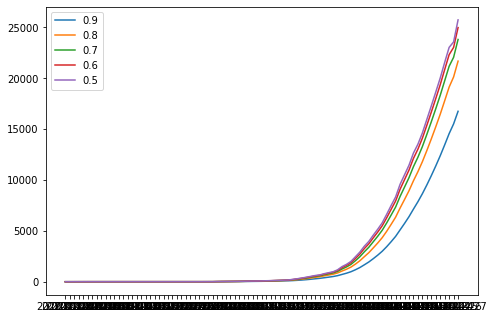

In [61]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
avg(0.9)
avg(0.8)
avg(0.7)
avg(0.6)
avg(0.5)
plt.legend()
plt.show()